> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 

> **Characteristics:**
- 01 - **PatientId:**
    Identification of a patient
- 02 - **AppointmentID:**
    Identification of each appointment
- 03 - **Gender:**
    Male or Female. 
    Female is the greater proportion, woman takes way more care of they health in comparison to man.
- 04 - **ScheduledDay:**
    The day someone called or registered the appointment, this is before appointment of course.
- 05 - **AppointmentDay:**
    The day of the actuall appointment, when they have to visit the doctor.
- 06 - **Age:**
    How old is the patient.
- 07 - **Neighbourhood:**
    Where the appointment takes place.
- 08 - **Scholarship:**
    True of False. 
    something like medical insurance.
- 09 - **Hipertension:**
    True or False
- 10 - **Diabetes:**
    True or False
- 11 - **Alcoholism:**
    True or False
- 12 - **Handcap:**
    True or False
- 13 - **SMS_received:**
    1 or more messages sent to the patient.
- 14 - **No-show:**
    True or False. True for non show false for show.
### Question(s) for Analysis

- ##### **Q1:** Are females more likely to show than males?
- ##### **Q2:** Is there an age range that is the most likely to show, and also not to show?
- ##### **Q3:** patients with (Hipertension, Diabetes, Alcoholism or Handcap) are most likely to show?
- ##### **Q4:** Is the appointment day can effect The show or not? weekend, holiday, workday.
- ##### **Q5:** Does the num of days between the AppointmentDay and ScheduledDay matter?
- ##### **Q6:** Are people with scholarships are most likely to attend or not in school days?

holidays:

Tiradentes Day	Thu, Apr 21, 2016

Labour Day	Sun, May 1, 2016

seasons:

Autumn / Fall	March 21st to June 20th

Winter	June 21st to September 20th

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> Check the data rows and columns:
- What are the columns data types?
- Check for missing data or duplicated rows.

> Check for invaild data like:
- Age < 0 or too high.
- AppointmentDay before ScheduledDay.
- One of the True or False categories have diffrent value.

### Exploring Data

#### Loading data

In [74]:
pathh = "/content/drive/MyDrive/Colab Notebooks/proj2/noshowappointments.csv"
df = pd.read_csv(pathh)

In [75]:
#df = pd.read_csv('noshowappointments.csv')

Checking the data

In [76]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- lowercase all columns names.
- handcap should be handicap, No-show should be No_show
- The PatientId and AppointmentID columns are irrelevant and should be removed.

#### Checking for missing values and coolumn data types:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There are no null data in the dataset.
- The 'ScheduledDay' and 'AppointmentDay' columns should be converted to datetime and devided into day of week, month.
- No-show should be converted to int (0, 1).

#### Checking for duplicates:

In [78]:
df.duplicated().sum()

0

- There are no duplications

#### Having a look on the data:

In [79]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [80]:
for ii in df.columns:
    if ii not in ['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay']:
        print(f"{ii}:\n", np.sort(df[ii].unique()).tolist(),"\n")
        

Gender:
 ['F', 'M'] 

Age:
 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115] 

Neighbourhood:
 ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', '

- Age: has -1 and 115 values that should be dropped or filled with another value depending on the count.
- Handcap: has 2, 3 and 4 values should be dropped or filled with another value depending on the count.

In [81]:
df.Age.value_counts()[[-1,115]]

-1      1
 115    5
Name: Age, dtype: int64

- only 6 values so will be dropped

In [82]:
df.Handcap.value_counts().sort_index()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

- will replace the higher values with 1


### Data Cleaning
> - Remove the PatientId, AppointmentID columns as they are irrelevant to our analysis.
- Rename 'Handcap' to 'Handicap', 'No-show' to 'No_show', 'ScheduledDay' to 'Scheduled_Day' and 'AppointmentDay' to 'Appointment_Day'.
- Lowercase all the columns names.
- Convert 'ScheduledDay' and 'AppointmentDay' to datetime.
- Create scheduled_Hour, appointment_day_of_week, appointment_month
- Check if there invaild ScheduledDay, AppointmentDay. if there will be dropped.
- Convert No-show to integer (0, 1).
- Drop the invalid age values.
- Replace the higher values of handicap to 1.

#### Remove the PatientId, AppointmentID columns as they are irrelevant to our analysis:

In [83]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)


#### Rename 'Handcap' to 'Handicap', 'No-show' to 'No_show', 'ScheduledDay' to 'Scheduled_Day' and 'AppointmentDay' to 'Appointment_Day':

In [84]:
df.rename(columns={'Handcap': 'Handicap', 'No-show': 'No_show',
                   'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day'}, inplace=True)

##### Confirm changes

In [85]:
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Lowercase all the columns names:

In [86]:
df.columns = df.columns.str.lower()

##### Confirm changes

In [87]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No



#### Convert 'scheduledday' and 'appointmentday' to datetime:

In [88]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

##### Confirm changes

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   neighbourhood    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hipertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handicap         110527 non-null  int64              
 10  sms_received     110527 non-null  int64              
 11  no_show          110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usag

#### Create scheduled_Hour, appointment_day_of_week, appointment_month:

In [90]:
df['scheduled_hour'] = df['scheduled_day'].dt.hour
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'].dt.date)

df['appointment_day_of_week'] = df['appointment_day'].dt.day_name()
df['appointment_month'] = df['appointment_day'].dt.month
df['appointment_day'] = pd.to_datetime(df['appointment_day'].dt.date)

##### Confirm changes

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   gender                   110527 non-null  object        
 1   scheduled_day            110527 non-null  datetime64[ns]
 2   appointment_day          110527 non-null  datetime64[ns]
 3   age                      110527 non-null  int64         
 4   neighbourhood            110527 non-null  object        
 5   scholarship              110527 non-null  int64         
 6   hipertension             110527 non-null  int64         
 7   diabetes                 110527 non-null  int64         
 8   alcoholism               110527 non-null  int64         
 9   handicap                 110527 non-null  int64         
 10  sms_received             110527 non-null  int64         
 11  no_show                  110527 non-null  object        
 12  scheduled_hour  

In [92]:
df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_hour,appointment_day_of_week,appointment_month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4


#### Search for invaild dates:

In [93]:
df['num_odays'] = (df['appointment_day'] - df['scheduled_day']).dt.days

In [94]:
np.sort(df['num_odays'].unique())

array([ -6,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123,
       125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176,
       179])

In [95]:
df['num_odays'].value_counts().sort_index().iloc[:5]

-6        1
-1        4
 0    38563
 1     5213
 2     6725
Name: num_odays, dtype: int64

Only 5, so will be dropped

#### Drop invaild dates:

In [96]:
df = df.query('num_odays>=0')

##### Confirm changes

In [97]:
df['num_odays'].value_counts().sort_index().iloc[:5]

0    38563
1     5213
2     6725
3     2737
4     5290
Name: num_odays, dtype: int64


#### Convert no_show to integer (0, 1):

In [98]:
df['no_show'] = df['no_show'].apply(lambda x: 0 if x == "No" else 1)

##### Confirm changes

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   gender                   110522 non-null  object        
 1   scheduled_day            110522 non-null  datetime64[ns]
 2   appointment_day          110522 non-null  datetime64[ns]
 3   age                      110522 non-null  int64         
 4   neighbourhood            110522 non-null  object        
 5   scholarship              110522 non-null  int64         
 6   hipertension             110522 non-null  int64         
 7   diabetes                 110522 non-null  int64         
 8   alcoholism               110522 non-null  int64         
 9   handicap                 110522 non-null  int64         
 10  sms_received             110522 non-null  int64         
 11  no_show                  110522 non-null  int64         
 12  scheduled_hour  


#### Drop the invalid age values:

In [100]:
df = df.query('age>=0 and age<=102')

##### Confirm changes

In [101]:
np.sort(df['age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102])


#### Replace the higher values of handicap to 1

In [102]:
df['handicap'] = df['handicap'].apply(lambda x: 1 if x >= 1 else 0)

##### Confirm changes

In [103]:
np.sort(df['handicap'].unique())

array([0, 1])

<a id='eda'></a>
## Exploratory Data Analysis



In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   gender                   110516 non-null  object        
 1   scheduled_day            110516 non-null  datetime64[ns]
 2   appointment_day          110516 non-null  datetime64[ns]
 3   age                      110516 non-null  int64         
 4   neighbourhood            110516 non-null  object        
 5   scholarship              110516 non-null  int64         
 6   hipertension             110516 non-null  int64         
 7   diabetes                 110516 non-null  int64         
 8   alcoholism               110516 non-null  int64         
 9   handicap                 110516 non-null  int64         
 10  sms_received             110516 non-null  int64         
 11  no_show                  110516 non-null  int64         
 12  scheduled_hour  

#### Creeating series of boolean index to help selecting data

In [108]:
showed = df.no_show == 0
dntshow = df.no_show == 1

##### Confirm changes

In [109]:
df[dntshow].head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_hour,appointment_day_of_week,appointment_month,num_odays
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,15,Friday,4,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,15,Friday,4,2


### Research Question 1 (Are Females More Likely to Show Than Males?)

#### Probability of females and males to show up

In [111]:
showed_mf = df[showed].gender.value_counts().sort_index()
dntshow_mf = df[dntshow].gender.value_counts().sort_index()
tot_mf = df.gender.value_counts().sort_index()
(showed_mf/tot_mf)*100

F    79.69122
M    80.03619
Name: gender, dtype: float64

- Males are more likely to show than females by 0.34%

#### Number of appointments by gender

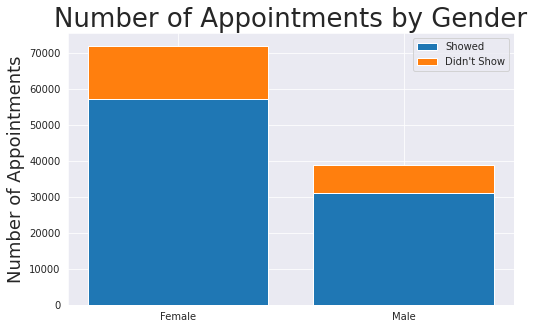

In [237]:
labels = ['Female', 'Male']

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(labels, showed_mf, label='Showed')
ax.bar(labels, dntshow_mf, bottom=showed_mf, label="Didn't Show")

ax.set_ylabel('Number of Appointments', fontsize=18)
ax.set_title('Number of Appointments by Gender', fontsize=26)
ax.legend()

plt.show()

- Females are definitely more likely to go to the hospital and take a better care about thier health than males.

### Research Question 2  (Replace this header name!)

#### Number of appointments by age

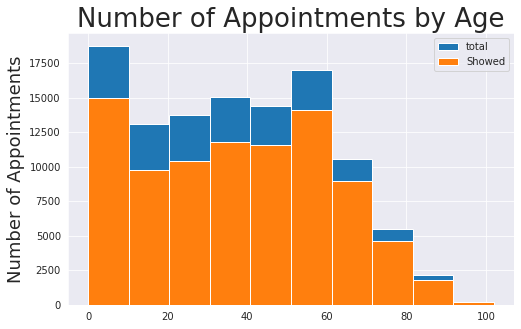

In [233]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.hist(df.age, bins=10, label='total')
ax1.hist(df[showed].age, bins=10, label='Showed')

ax1.set_ylabel('Number of Appointments', fontsize=18)
ax1.set_title('Number of Appointments by Age', fontsize=26)

ax1.legend()
plt.show()

- The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60).

#### Probabilities of age ranges to show up

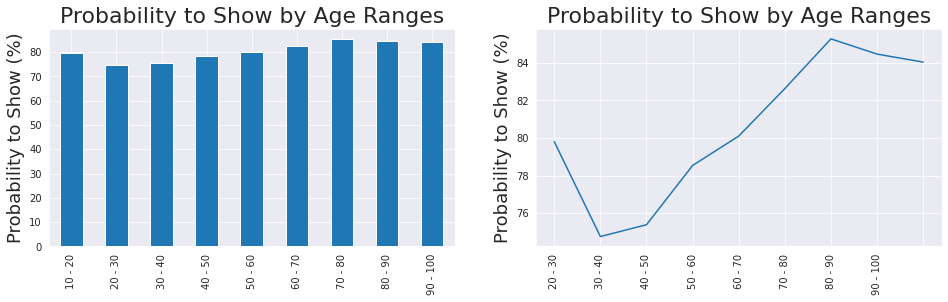

In [228]:
bins = list(range(0,110,10))
labels = [str(ii) +" - "+str(ii+10) for ii in bins[1:]]

showed_age = df[showed].age.value_counts(bins=bins).sort_index()
tot_age = df.age.value_counts(bins=bins).sort_index()

plt.figure(figsize=(16, 4))

plt.subplot(121)
ax2 = (showed_age[:-1]*100/tot_age[:-1]).plot.bar();
ax2.set_xticklabels(labels[:-1]);
ax2.set_ylabel('Probability to Show (%)', fontsize=18);
ax2.set_title('Probability to Show by Age Ranges', fontsize=22);

plt.subplot(122)
ax3 = (showed_age[:-1]*100/tot_age[:-1]).plot.line();
ax3.set_xticklabels(labels[:-1]);
ax3.set_ylabel('Probability to Show (%)', fontsize=18);
ax3.set_title('Probability to Show by Age Ranges', fontsize=22);
plt.xticks(rotation=90);

- The age range with the highest propaplity to show is (60 to 90) with average propaplity of 84.5%
- The age range with the lowest propaplity to show is (10 to 30) with average propaplity of 75%

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])